In [1]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd
import gensim
from gensim.models import CoherenceModel
from gensim import corpora
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import re
from importlib import reload
import warnings
from pprint import pprint
import string
import pyLDAvis.gensim as gensimvis
import pickle 
import pyLDAvis
plt.style.use('fivethirtyeight')
mpl.rc('patch', edgecolor = 'dimgray', linewidth=1)
%matplotlib inline

In [2]:
STOPWORDS.update(["a","el","del","lo", "abord", "absolument", "afin", "ah", "ai", "aie", "aient", "aies", "ailleurs", "ainsi", "ait", "allaient", "allo",
 "allons", "allô", "alors", "anterieur", "anterieure", "anterieures", "apres", "après", "as", "assez", "attendu", "au",
 "aucun", "aucune", "aucuns", "aujourd", "aujourd'hui", "aupres", "auquel", "aura", "aurai", "auraient", "aurais",
 "aurait", "auras", "aurez", "auriez", "aurions", "aurons", "auront", "aussi", "autant", "autre", "autrefois",
 "autrement", "autres", "autrui", "aux", "auxquelles", "auxquels", "avaient", "avais", "avait", "avant", "avec", "avez",
 "aviez", "avions", "avoir", "avons", "ayant", "ayez", "ayons", "b", "bah", "bas", "basee", "bat", "beau", "beaucoup",
 "bien", "bigre", "bon", "boum", "bravo", "brrr", "c", "car", "ce", "ceci", "cela", "celle", "celle-ci", "celle-là",
 "celles", "celles-ci", "celles-là", "celui", "celui-ci", "celui-là", "celà", "cent", "cependant", "certain",
 "certaine", "certaines", "certains", "certes", "ces", "cet", "cette", "ceux", "ceux-ci", "ceux-là", "chacun",
 "chacune", "chaque", "cher", "chers", "chez", "chiche", "chut", "chère", "chères", "ci", "cinq", "cinquantaine",
 "cinquante", "cinquantième", "cinquième", "clac", "clic", "combien", "comme", "comment", "comparable", "comparables",
 "compris", "concernant", "contre", "couic", "crac", "d", "da", "dans", "de", "debout", "dedans", "dehors", "deja",
 "delà", "depuis", "dernier", "derniere", "derriere", "derrière", "des", "desormais", "desquelles", "desquels",
 "dessous", "dessus", "deux", "deuxième", "deuxièmement", "devant", "devers", "devra", "devrait", "different",
 "differentes", "differents", "différent", "différente", "différentes", "différents", "dire", "directe", "directement",
 "dit", "dite", "dits", "divers", "diverse", "diverses", "dix", "dix-huit", "dix-neuf", "dix-sept", "dixième", "doit",
 "doivent", "donc", "dont", "dos", "douze", "douzième", "dring", "droite", "du", "duquel", "durant", "dès", "début",
 "désormais", "e", "effet", "egale", "egalement", "egales", "eh", "elle", "elle-même", "elles", "elles-mêmes", "en",
 "encore", "enfin", "entre", "envers", "environ", "es", "essai", "est", "et", "etant", "etc", "etre", "eu", "eue",
 "eues", "euh", "eurent", "eus", "eusse", "eussent", "eusses", "eussiez", "eussions", "eut", "eux", "eux-mêmes",
 "exactement", "excepté", "extenso", "exterieur", "eûmes", "eût", "eûtes", "f", "fais", "faisaient", "faisant", "fait",
 "faites", "façon", "feront", "fi", "flac", "floc", "fois", "font", "force", "furent", "fus", "fusse", "fussent",
 "fusses", "fussiez", "fussions", "fut", "fûmes", "fût", "fûtes", "g", "gens", "h", "ha", "haut", "hein", "hem", "hep",
 "hi", "ho", "holà", "hop", "hormis", "hors", "hou", "houp", "hue", "hui", "huit", "huitième", "hum", "hurrah", "hé",
 "hélas", "i", "ici", "il", "ils", "importe", "j", "je", "jusqu", "jusque", "juste", "k", "l", "la", "laisser",
 "laquelle", "las", "le", "lequel", "les", "lesquelles", "lesquels", "leur", "leurs", "longtemps", "lors", "lorsque",
 "lui", "lui-meme", "lui-même", "là", "lès", "m", "ma", "maint", "maintenant", "mais", "malgre", "malgré", "maximale",
 "me", "meme", "memes", "merci", "mes", "mien", "mienne", "miennes", "miens", "mille", "mince", "mine", "minimale",
 "moi", "moi-meme", "moi-même", "moindres", "moins", "mon", "mot", "moyennant", "multiple", "multiples", "même",
 "mêmes", "n", "na", "naturel", "naturelle", "naturelles", "ne", "neanmoins", "necessaire", "necessairement", "neuf",
 "neuvième", "ni", "nombreuses", "nombreux", "nommés", "non", "nos", "notamment", "notre", "nous", "nous-mêmes",
 "nouveau", "nouveaux", "nul", "néanmoins", "nôtre", "nôtres", "o", "oh", "ohé", "ollé", "olé", "on", "ont", "onze",
 "onzième", "ore", "ou", "ouf", "ouias", "oust", "ouste", "outre", "ouvert", "ouverte", "ouverts", "o|", "où", "p",
 "paf", "pan", "par", "parce", "parfois", "parle", "parlent", "parler", "parmi", "parole", "parseme", "partant",
 "particulier", "particulière", "particulièrement", "pas", "passé", "pendant", "pense", "permet", "personne",
 "personnes", "peu", "peut", "peuvent", "peux", "pff", "pfft", "pfut", "pif", "pire", "pièce", "plein", "plouf",
 "plupart", "plus", "plusieurs", "plutôt", "possessif", "possessifs", "possible", "possibles", "pouah", "pour",
 "pourquoi", "pourrais", "pourrait", "pouvait", "prealable", "precisement", "premier", "première", "premièrement",
 "pres", "probable", "probante", "procedant", "proche", "près", "psitt", "pu", "puis", "puisque", "pur", "pure", "q",
 "qu", "quand", "quant", "quant-à-soi", "quanta", "quarante", "quatorze", "quatre", "quatre-vingt", "quatrième",
 "quatrièmement", "que", "quel", "quelconque", "quelle", "quelles", "quelqu'un", "quelque", "quelques", "quels", "qui",
 "quiconque", "quinze", "quoi", "quoique", "r", "rare", "rarement", "rares", "relative", "relativement", "remarquable",
 "rend", "rendre", "restant", "reste", "restent", "restrictif", "retour", "revoici", "revoilà", "rien", "s", "sa",
 "sacrebleu", "sait", "sans", "sapristi", "sauf", "se", "sein", "seize", "selon", "semblable", "semblaient", "semble",
 "semblent", "sent", "sept", "septième", "sera", "serai", "seraient", "serais", "serait", "seras", "serez", "seriez",
 "serions", "serons", "seront", "ses", "seul", "seule", "seulement", "si", "sien", "sienne", "siennes", "siens",
 "sinon", "six", "sixième", "soi", "soi-même", "soient", "sois", "soit", "soixante", "sommes", "son", "sont", "sous",
 "souvent", "soyez", "soyons", "specifique", "specifiques", "speculatif", "stop", "strictement", "subtiles",
 "suffisant", "suffisante", "suffit", "suis", "suit", "suivant", "suivante", "suivantes", "suivants", "suivre", "sujet",
 "superpose", "sur", "surtout", "t", "ta", "tac", "tandis", "tant", "tardive", "te", "tel", "telle", "tellement",
 "telles", "tels", "tenant", "tend", "tenir", "tente", "tes", "tic", "tien", "tienne", "tiennes", "tiens", "toc", "toi",
 "toi-même", "ton", "touchant", "toujours", "tous", "tout", "toute", "toutefois", "toutes", "treize", "trente", "tres",
 "trois", "troisième", "troisièmement", "trop", "très", "tsoin", "tsouin", "tu", "té", "u", "un", "une", "unes",
 "uniformement", "unique", "uniques", "uns", "v", "va", "vais", "valeur", "vas", "vers", "via", "vif", "vifs", "vingt",
 "vivat", "vive", "vives", "vlan", "voici", "voie", "voient", "voilà", "voire", "vont", "vos", "votre", "vous",
 "vous-mêmes", "vu", "vé", "vôtre", "vôtres", "w", "x", "y", "z", "zut", "à", "â", "ça", "ès", "étaient", "étais",
 "était", "étant", "état", "étiez", "étions", "été", "étée", "étées", "étés", "êtes", "être", "ô"])

In [3]:
warnings.filterwarnings("ignore")

In [4]:
import clean_tweets_dataframe as cld

In [5]:
reload(cld)

<module 'clean_tweets_dataframe' from 'C:\\Users\\Faith Bagire\\PycharmProjects\\pythonProject\\tweets_analyze\\clean_tweets_dataframe.py'>

In [6]:
df_tweet=pd.read_excel("processed_tweet_data.xlsx",engine='openpyxl',dtype={'tweet_id':'str'})

In [7]:
cleaner=cld.CleanTweets(df_tweet)

Automation in Action...!!!


**Using cleaner module from clean_tweets_dataframe to clean the imported dataset**

In [8]:
df_tweet=cleaner.drop_unwanted_column(df_tweet)
df_tweet=cleaner.drop_duplicate(df_tweet)
df_tweet=cleaner.convert_to_datetime(df_tweet)
df_tweet=cleaner.convert_to_numbers(df_tweet)
df_tweet=cleaner.remove_other_languages_tweets(df_tweet)
df_tweet=cleaner.treat_special_characters(df_tweet)

In [9]:
print(df_tweet.shape)
df_tweet

(1215, 20)


,created_at,source,original_text,cleaned_text,polarity,subjectivity,sentiment,lang,likes_count,retweet_count,original_author,followers_count,friends_count,possibly_sensitive,hashtags,retweet_hashtags,user_mentions,place,tweet_url,tweet_id
8,2022-07-18 15:25:28+00:00,Twitter for Android,RT @TheoMpoze: ‘It shouldn’t be happening agai...,‘It shouldn’t be happening again’: rebels ret...,-0.150000,0.100000,Negative,en,0,9,Nduwamungu5,1579,418,False,"M23, DRC","M23, DRC, Kivu, RDF, Kagame",TheoMpoze,NaN,NaN,1549052740772429826
9,2022-07-18 15:21:48+00:00,EUwatch,European heat wave: Britain announces national...,European heat wave: Britain announces national...,0.000000,0.000000,Neutral,en,0,0,EUwatchers,25730,7621,False,NaN,NaN,NaN,Brussels,NaN,1549051820839825408
17,2022-07-18 15:14:41+00:00,Microsoft Power Platform,Why are weather forecasts not always accurate?...,Why are weather forecasts not always accurate?...,0.400000,0.633333,Positive,en,0,0,123_INFO_DE,118,12,False,123INFO,NaN,NaN,Germany,NaN,1549050029469364225
18,2022-07-18 15:10:04+00:00,Twitter for iPhone,RT @aqlila1: Tried to draw Rovina Desamero of ...,Tried to draw Rovina Desamero of Dosage of Ser...,0.000000,0.000000,Neutral,en,0,152,AriaSoondingie,621,1559,False,NaN,NaN,"aqlila1, inksteadywp",farm ni doh kyung soo,https://twitter.com/aqlila1/status/15060770759...,1549048865307111424
19,2022-07-18 15:08:55+00:00,Twitter Web App,RT @EUwatchers: Spain: Picasso sketch seized b...,Spain: Picasso sketch seized by customs offici...,0.000000,0.000000,Neutral,en,0,1,arson_cole,235,1699,False,NaN,NaN,EUwatchers,NaN,https://www.dw.com/en/spain-picasso-sketch-sei...,1549048575640109056
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10411,2022-07-11 15:54:01+00:00,Buffer,The County of San Diego Regional Decarbonizati...,The County of San Diego Regional Decarbonizati...,0.000000,0.000000,Neutral,en,0,0,SDClimateCollab,308,275,False,NaN,NaN,NaN,"San diego, ca",NaN,1546523210673520641
10412,2022-07-11 15:53:52+00:00,Hootsuite Inc.,Thank you everyone who joined us for our RDF A...,Thank you everyone who joined us for our RDF A...,0.433333,0.505556,Positive,en,6,0,RazaFund,2452,340,False,UnidosUS22,NaN,NaN,"Phoenix, az",NaN,1546523173314772994
10414,2022-07-11 15:51:46+00:00,EUwatch,Srebrenica massacre: Netherlands apologizes af...,Srebrenica massacre: Netherlands apologizes af...,0.000000,0.000000,Neutral,en,0,0,EUwatchers,25730,7621,False,NaN,NaN,NaN,Brussels,NaN,1546522645314904069
10416,2022-07-11 15:51:32+00:00,Twitter Web App,"Rwanda Security forces, (RDF &amp; RNP) 70-80...","Rwanda Security forces, (RDF &amp; RNP) 70-80...",0.000000,0.000000,Neutral,en,4,0,MurindwaJames,1580,1591,False,NaN,NaN,NaN,NaN,NaN,1546522588502949888


In [10]:
df_tweet['lang'].value_counts()

en      795
fr      331
kiny     89
Name: lang, dtype: int64

In [11]:
df_tweet.dtypes

created_at            datetime64[ns, UTC]
source                             object
original_text                      object
cleaned_text                       object
polarity                          float64
subjectivity                      float64
sentiment                          object
lang                               object
likes_count                         int64
retweet_count                       int64
original_author                    object
followers_count                     int64
friends_count                       int64
possibly_sensitive                   bool
hashtags                           object
retweet_hashtags                   object
user_mentions                      object
place                              object
tweet_url                          object
tweet_id                           object
dtype: object

###  Export french tweets, make translation and insert back new translated tweets

In [12]:
df_trans=df_tweet.query("lang=='fr'| lang =='kiny'")[['original_text','cleaned_text','lang']]
df_trans.to_excel('df_to_translate.xlsx')

### translation completed

In [13]:
dict_to_translate=df_tweet.query("lang=='fr'| lang =='kiny'")['cleaned_text'].to_dict()

dict_translated=pd.read_excel('df_translated.xlsx',engine='openpyxl',index_col=0,usecols=[0,4]).to_dict()['translation']

In [14]:
for idx in dict_to_translate.keys():
    df_tweet.loc[idx, 'cleaned_text'] = dict_translated[idx]

In [15]:
from textblob import TextBlob

In [16]:
for idx in dict_translated.keys():
    blob = TextBlob(dict_translated[idx])
    pol=blob.sentiment.polarity
    df_tweet.loc[idx, 'sentiment'] = 'Positive' if pol>0 else ('Negative' if pol < 0 else 'Neutral')

#### Save new dataframe for dashboard creation

In [17]:
df_tweet['created_at'] = df_tweet['created_at'].apply(lambda x: x.replace(tzinfo=None))

In [18]:
df_tweet.to_excel('sql_dashboard/processed_tweet_data.xlsx')

In [19]:
d_mostflwd=df_tweet[['original_author']]

In [20]:
d_mostflwd['hh']=d_mostflwd['original_author'].apply(lambda x : '['+x+']'+'(https://twitter.com/'+str(x)+')')

In [21]:
d_mostflwd

,original_author,hh
8,Nduwamungu5,[Nduwamungu5](https://twitter.com/Nduwamungu5)
9,EUwatchers,[EUwatchers](https://twitter.com/EUwatchers)
17,123_INFO_DE,[123_INFO_DE](https://twitter.com/123_INFO_DE)
18,AriaSoondingie,[AriaSoondingie](https://twitter.com/AriaSoond...
19,arson_cole,[arson_cole](https://twitter.com/arson_cole)
...,...,...
10411,SDClimateCollab,[SDClimateCollab](https://twitter.com/SDClimat...
10412,RazaFund,[RazaFund](https://twitter.com/RazaFund)
10414,EUwatchers,[EUwatchers](https://twitter.com/EUwatchers)
10416,MurindwaJames,[MurindwaJames](https://twitter.com/MurindwaJa...


### EDA of Tweets

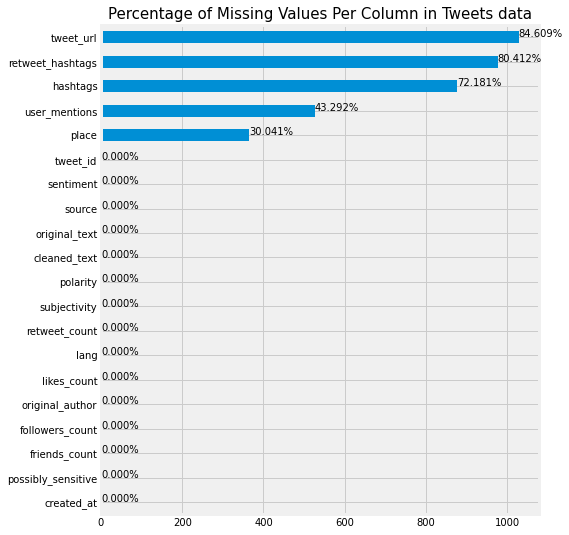

In [22]:
# Check the percentage of missing values in every column
ax = df_tweet.isna().sum().sort_values().plot(kind = 'barh', figsize = (7, 9))
plt.title('Percentage of Missing Values Per Column in Tweets data', fontdict={'size':15})

for p in ax.patches:
    percentage ='{:,.3f}%'.format((p.get_width()/df_tweet.shape[0])*100)
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    ax.annotate(percentage,(x,y))

<AxesSubplot:ylabel='Place'>

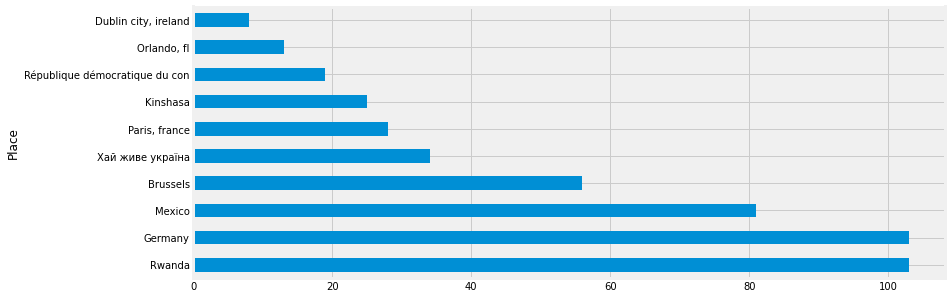

In [23]:
df_tweet['place'].value_counts(sort=True, ascending=False)[:10].plot(kind='barh',
                                                                     figsize=(12,5),xlabel='Place')

In [24]:
df_tweet_date=df_tweet.set_index('created_at')

<AxesSubplot:xlabel='Date,time'>

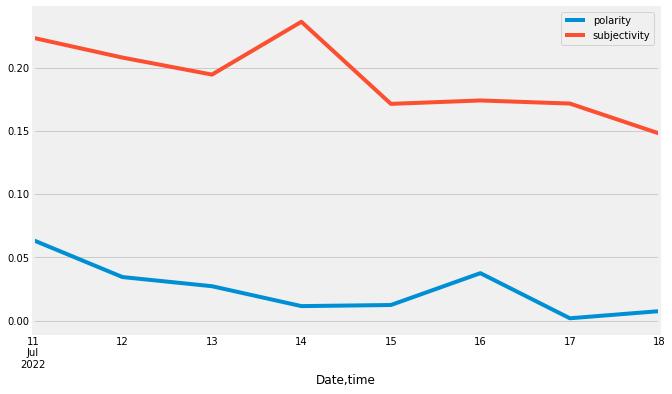

In [25]:
df_tweet_date.resample('D').mean()[['polarity','subjectivity']].dropna().plot(figsize=(10,6),xlabel='Date,time')

### uni-variate Analysis on Hashtags


In [26]:
hashtag_df=df_tweet[['original_text','hashtags','retweet_hashtags']]

In [27]:
def find_hashtags(df_tweet):
    '''This function will extract hashtags'''
    return re.findall('(#[A-Za-z]+[A-Za-z0-9-_]+)', df_tweet)

hashtag_df['hashtag_check']=df_tweet.original_text.apply(find_hashtags)

In [28]:
hashtag_df.dropna(subset=['hashtag_check'],inplace=True)

In [29]:
tags_list=list(hashtag_df['hashtag_check'])

In [30]:
hashtags_list_df = pd.DataFrame([tag for tags_row in tags_list for tag in tags_row],columns=['hashtag'])

In [31]:
hashtags_list_df

,hashtag
0,#M23
1,#DRC
2,#KnowledgeGraphs
3,#abdsc
4,#Semantic
...,...
652,#Majorit
653,#RDF
654,#RDF
655,#Kagame


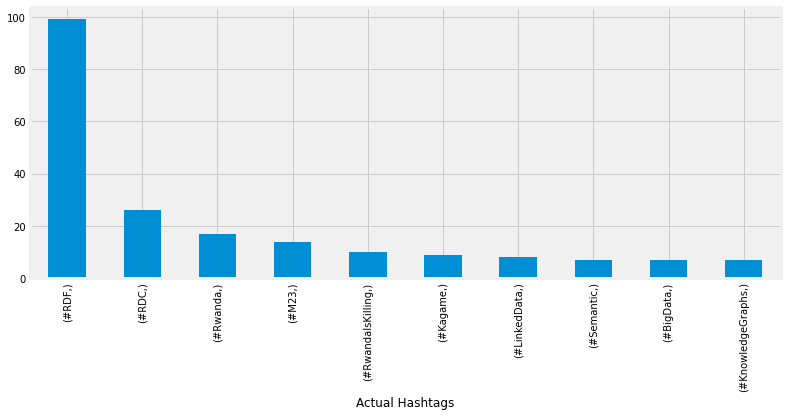

In [32]:
_=hashtags_list_df.value_counts()[:10].plot(kind='bar',figsize=(12,5),xlabel='Actual Hashtags')

In [33]:
#Convert hastags to lowercase
hashtags_list_df['hashtag'] = hashtags_list_df['hashtag'].str.lower()

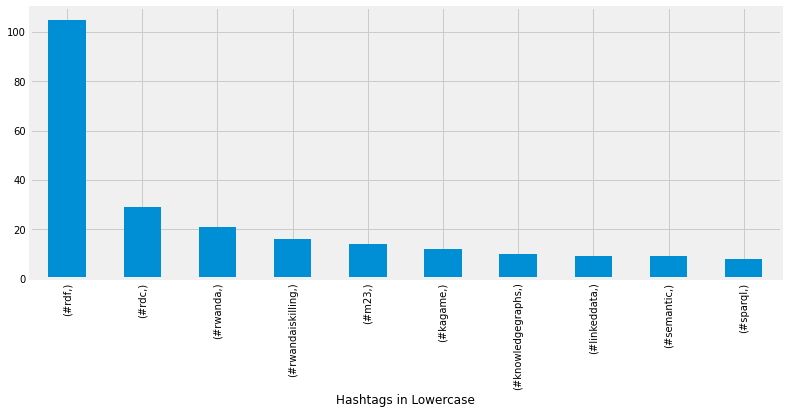

In [34]:
_=hashtags_list_df.value_counts()[:10].plot(kind='bar',figsize=(12,5),xlabel='Hashtags in Lowercase')

In [35]:
user_summary=df_tweet.groupby('original_author').agg({'cleaned_text':'count','followers_count':'max',
                                         'polarity':'mean','subjectivity':'mean', 'sentiment':pd.Series.mode})

In [36]:
user_summary.sort_values(by='cleaned_text',ascending=False).head(10)

,cleaned_text,followers_count,polarity,subjectivity,sentiment
original_author,,,,,
123_INFO_DE,101,118,0.016559,0.162348,Neutral
Noticieros_MEX,80,4915,-0.036861,0.230630,Neutral
EUwatchers,52,25730,-0.009623,0.183093,Neutral
rogue_corq,34,1834,0.016583,0.168469,Neutral
bouche_bee,25,2836,0.041667,0.138667,Neutral
EtudesRwanda,20,500,0.000000,0.000000,"[Neutral, Positive]"
East_DRC_News,14,1262,0.000000,0.000000,Positive
acute_tomato,14,17388,-0.036905,0.198810,Neutral
PhotoFinishBot,13,131,0.017486,0.577119,Neutral


Sentiment summary of the tweets

In [37]:
text_grouped = df_tweet.groupby('sentiment').count()['cleaned_text'].reset_index()

In [38]:
text_grouped

,sentiment,cleaned_text
0,Negative,266
1,Neutral,566
2,Positive,383


<AxesSubplot:xlabel='sentiment', ylabel='count'>

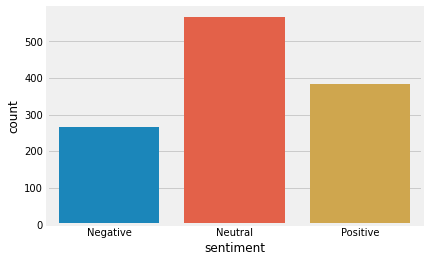

In [39]:
sns.countplot(x='sentiment', data=df_tweet)

**Most frequent words in our tweets dataset**

In [40]:
english_tweets=cleaner.remove_other_languages_tweets(df_tweet)

In [41]:
# text Preprocessing
english_tweets['cleaned_text'] = english_tweets['cleaned_text'].str.lower()
english_tweets['cleaned_text'] = english_tweets['cleaned_text'].apply(
    lambda x: x.translate(str.maketrans('', '', string.punctuation)))

In [42]:
all_words=' '.join(english_tweets.cleaned_text.values)
wordcloud_obj=WordCloud(width=1000,height=600,stopwords=STOPWORDS).generate(all_words)

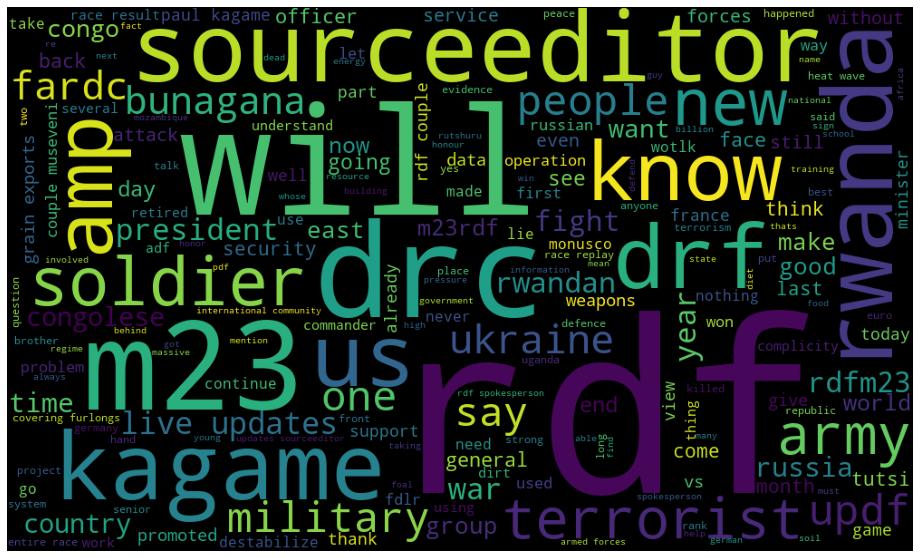

In [43]:
plt.figure(figsize=(20, 10))

fgg=plt.imshow(wordcloud_obj)
plt.axis('off')
# plt.title('Most Frequent Words In Our Tweets',fontsize=16)
plt.show()

In [44]:
fgg.figure.savefig('sql_dashboard/cw_rdf.png',bbox_inches='tight',pad_inches=0)

### Topic modeling

In [45]:
def preprocess_data(tweets_df):
    # Converting tweets to list of words For feature engineering
    sentence_list = [tweet for tweet in tweets_df['cleaned_text']]
    word_list = [sent.split() for sent in sentence_list]
    #Save only words and excludes emojis, punctuations
    word_list_new=[]
    for sent in word_list:
        word_list_new.append([re.split(r'\W+',word) for word in sent if word not in STOPWORDS and not word.isdigit()])
    
    word_list_final=[]
    for sent in word_list_new:
        word_list_final.append([i[0] for i in sent])
    # Create dictionary which contains Id and word 
    word_to_id = corpora.Dictionary(word_list_final)
    corpus_1 = [word_to_id.doc2bow(tweet) for tweet in word_list_final]

    return word_list_final, word_to_id, corpus_1

In [46]:
word_list, id2word, corpus=preprocess_data(english_tweets)

In [47]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus,
                                           id2word=id2word,
                                           num_topics=5, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=False)

In [48]:
pprint(lda_model.show_topics(formatted=False))

[(0,
  [('rdf', 0.031078115),
   ('rwanda', 0.027780328),
   ('m23', 0.01846819),
   ('promoted', 0.01805831),
   ('military', 0.014972959),
   ('general', 0.014829519),
   ('forces', 0.013624812),
   ('spokesperson', 0.012741505),
   ('rank', 0.0110818315),
   ('know', 0.010423005)]),
 (1,
  [('', 0.074469976),
   ('amp', 0.025507573),
   ('sourceeditor', 0.020905565),
   ('ukraine', 0.019843074),
   ('new', 0.018361436),
   ('russia', 0.015058066),
   ('rdf', 0.011998553),
   ('live', 0.011910505),
   ('without', 0.010925235),
   ('updates', 0.010160959)]),
 (2,
  [('drc', 0.020872928),
   ('president', 0.020087775),
   ('rdf', 0.019061927),
   ('army', 0.018209444),
   ('will', 0.013117706),
   ('soldiers', 0.012663073),
   ('drf', 0.012410064),
   ('rwandan', 0.010999793),
   ('last', 0.0092591485),
   ('think', 0.009006245)]),
 (3,
  [('rdf', 0.036484506),
   ('us', 0.01725322),
   ('security', 0.016312433),
   ('will', 0.01226258),
   ('operations', 0.012226584),
   ('', 0.011080

### Model Analysis

In [49]:
# Compute Perplexity

#It's a measure of how good the model is. The lower the better. Perplexity is a negative value
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  
# doc_lda = lda_model[corpus]

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=word_list, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\n Ldamodel Coherence Score/Accuracy on Tweets: ', coherence_lda)


Perplexity:  -8.40580496703978

 Ldamodel Coherence Score/Accuracy on Tweets:  0.4363148435888677


**Model 1 words with some digits, 5 topics**

Perplexity:  -9.857909007134007\
Ldamodel Coherence Score/Accuracy on Tweets:  0.4242327533406264

**Model 2 words without digits, 5 topics**

Perplexity:  -9.82031321033761\
Ldamodel Coherence Score/Accuracy on Tweets:  0.4368570452021986

In [50]:
# Visualize the topics
pyLDAvis.enable_notebook()

LDAvis_prepared = gensimvis.prepare(lda_model, corpus, id2word)
LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.234243 -0.025121       1        1  23.200282
1      0.068691  0.190647       2        1  19.718125
2     -0.001951 -0.166670       3        1  19.707821
4      0.179516 -0.100725       4        1  19.675939
3     -0.012012  0.101871       5        1  17.697832, topic_info=           Term        Freq       Total Category  logprob  loglift
0                262.000000  262.000000  Default  30.0000  30.0000
74       rwanda   91.000000   91.000000  Default  29.0000  29.0000
205         amp   71.000000   71.000000  Default  28.0000  28.0000
470   president   56.000000   56.000000  Default  27.0000  27.0000
1447    ukraine   55.000000   55.000000  Default  26.0000  26.0000
...         ...         ...         ...      ...      ...      ...
3733   thinking   12.926688   13.789009   Topic5  -5.2626   1.6672
31          rdf   91.010944  368.391095   Topic5  -3.3109   0.3336
143        will   30.589121   94.196028   Topic5  -4.4012   0.6070
0                 27.639456  262.315450   Topic5  -4.5026  -0.5186
413       video   12.792837   14.973323   Topic5  -5.2730   1.5743

[222 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
0         1  0.102930       
0         2  0.789126       
0         3  0.003812       
0         5  0.106742       
4475      5  0.929555  200pm
...     ...       ...    ...
638       2  0.986767    won
733       4  0.984533  world
14        1  0.840286  years
14        5  0.140048  years
1375      4  0.951128    yet

[210 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3, 5, 4])

###  END

**Number of Topics optimatization**

As we can see the coherence accuracy increases with number of topics which is expected but again \
many topics again would lead to meaningless conclusion. Let's use elbow method to find optimum number of topics

In [53]:
# # Find best LDA Model considering different number of topics

# params_dic={'topics_number':[],'coherence':[],'perplexity':[]}
# for top_number in range(1,10):
#     lda_model = gensim.models.ldamodel.LdaModel(corpus,
#                                             id2word=id2word,
#                                             num_topics=top_number, 
#                                             random_state=100,
#                                             update_every=1,
#                                             chunksize=100,
#                                             passes=10,
#                                             alpha='auto',
#                                             per_word_topics=False)
    
#     perplexity=lda_model.log_perplexity(corpus)  
#     # Compute Coherence Score
#     coherence_model_lda = CoherenceModel(model=lda_model, texts=word_list, dictionary=id2word, coherence='c_v')
#     coherence_lda = coherence_model_lda.get_coherence()
#     params_dic['topics_number'].append(top_number)
#     params_dic['coherence'].append(coherence_lda)
#     params_dic['perplexity'].append(perplexity)

In [54]:
# pd.DataFrame(params_dic).plot(y=['coherence'])
# # pd.read_csv("elbow_metrics.csv",index_col=0).plot(y=['coherence'])

In [ ]:
# import numpy as np

In [ ]:
# alphas = list(np.arange(0.01, 3, 0.1))
# alphas.append('symmetric')
# alphas.append('asymmetric')
# alphas.append('auto')

In [ ]:
# # Find best LDA Model considering different number of alpha

# params_dic_alpha={'alpha':[],'coherence':[],'perplexity':[]}
# for alpha in alphas:
#     lda_model = gensim.models.ldamodel.LdaModel(corpus,
#                                             id2word=id2word,
#                                             num_topics=7, 
#                                             random_state=100,
#                                             update_every=1,
#                                             chunksize=100,
#                                             passes=10,
#                                             alpha=alpha,
#                                             per_word_topics=False)
    
#     perplexity=lda_model.log_perplexity(corpus)  
#     # Compute Coherence Score
#     coherence_model_lda = CoherenceModel(model=lda_model, texts=word_list, dictionary=id2word, coherence='c_v')
#     coherence_lda = coherence_model_lda.get_coherence()
#     params_dic_alpha['alpha'].append(alpha)
#     params_dic_alpha['coherence'].append(coherence_lda)
#     params_dic_alpha['perplexity'].append(perplexity)

In [ ]:
# pd.DataFrame(params_dic_alpha).plot(y='coherence')#.sort_values('coherence',ascending=False)

**Model with selected optimum parameters**

In [ ]:
# # Build LDA model
# lda_model = gensim.models.ldamodel.LdaModel(corpus,
#                                            id2word=id2word,
#                                            num_topics=7, 
#                                            random_state=100,
#                                            update_every=1,
#                                            chunksize=100,
#                                            passes=10,
#                                            alpha=0.1,
#                                            per_word_topics=False)

In [ ]:
# pprint(lda_model.show_topics(formatted=False))

In [ ]:
# # Compute Perplexity
# #It's a measure of how good the model is. The lower the better. Perplexity is a negative value
# print('\nPerplexity: ', lda_model.log_perplexity(corpus))  
# # doc_lda = lda_model[corpus]

# # Compute Coherence Score
# coherence_model_lda = CoherenceModel(model=lda_model, texts=word_list, dictionary=id2word, coherence='c_v')
# coherence_lda = coherence_model_lda.get_coherence()
# print('\n Ldamodel Coherence Score/Accuracy on Tweets: ', coherence_lda)

In [ ]:
# # Visualize the topics
# pyLDAvis.enable_notebook()

# LDAvis_prepared = gensimvis.prepare(lda_model, corpus, id2word)
# LDAvis_prepared